# PART C- DEEP LEARNING -detect vessels


### importing the relevant libraries

In [263]:
#Dataset loading, keras for layer building
from keras import utils  
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.python import keras
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split


# read images from files
import os

#Numpy/pandas for analysis
import numpy as np
import collections, numpy
import pandas as pd
import seaborn as sns
from collections import Counter

#Visualisation
import matplotlib.pyplot as plt

## Classification of vessel types and determine shape
https://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets

{'Cargo': 1,
'Military': 2,
'Carrier': 3,
'Cruise': 4,
'Tankers': 5}

In [172]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
          pass

In [173]:
training_dataset =pd.read_csv("train.csv")

In [174]:
#spilt data set by test and train
X = training_dataset.drop(columns=['category'])
y = training_dataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [175]:
seed = 19
np.random.seed(seed)

In [176]:
X = []
y = []
path = "../PartC/train_folder/images/"
for x in training_dataset.iterrows() :
    path_join = os.path.join(path, x[1]['image'])
    image = tf.keras.preprocessing.image.load_img(path_join, target_size=(128,128), interpolation='lanczos')
    image = tf.keras.preprocessing.image.img_to_array(image)
    X.append(image)
    y.append(float(x[1]['category']))
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((6252, 128, 128, 3), (6252,))

In [177]:
types_of_ship = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tanker'}

In [264]:
category = training_dataset['category'].tolist()
Counter(category)

Counter({1: 2120, 2: 1167, 3: 916, 4: 832, 5: 1217})

## Image without scaling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: num must be an integer with 1 <= num <= 12, not 0

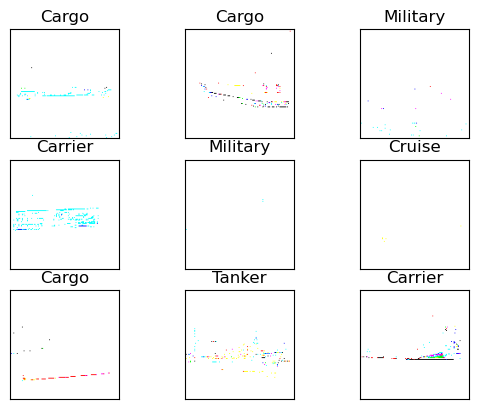

In [178]:
for x in range(20):
    plt.subplot(330+1+x)
    plt.imshow(X[x])
    plt.xticks([])
    plt.yticks([])
    plt.title(types_of_ship[y[x]])

## Data preprocessing

## Normalising of inputs- Scaling & one hot encode outputs

In [179]:
X =X/255


## image after scaling

ValueError: num must be an integer with 1 <= num <= 12, not 0

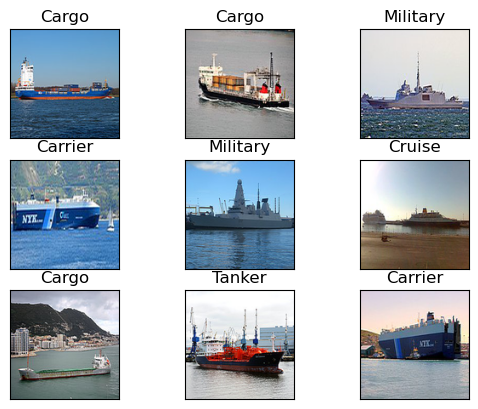

In [180]:
for x in range(20):
    plt.subplot(330+1+x)
    plt.imshow(X[x])
    plt.title(y[x])
    plt.xticks([])
    plt.yticks([])
    plt.title(types_of_ship[y[x]])

In [181]:
y = utils.to_categorical(y)
y.shape


(6252, 6)

## Create model

In [182]:
model = Sequential()
                

## Creating layers for deep learning

In [183]:
model.add(Conv2D(32, (3, 3), input_shape=(128,128,3), activation='relu'))
model.add(Dropout(0.2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [184]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
model.add(Flatten())
model.add(Dropout(0.2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dropout_4 (Dropout)         (None, 127008)            0         
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

In [186]:
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dropout_4 (Dropout)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                8128576   
                                                      

## Compile the model

In [187]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dropout_4 (Dropout)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                8128576   
                                                      

# Training the model

In [188]:
run_model = model.fit(X, y,
                  batch_size=100,
                  epochs=10,
                  verbose=1)


Epoch 1/10
63/63 [==============================] - 79s 1s/step - loss: 3.0926 - accuracy: 0.3308
Epoch 2/10
63/63 [==============================] - 65s 1s/step - loss: 1.0882 - accuracy: 0.5733
Epoch 3/10
63/63 [==============================] - 64s 1s/step - loss: 0.7750 - accuracy: 0.7124
Epoch 4/10
63/63 [==============================] - 60s 960ms/step - loss: 0.5519 - accuracy: 0.8125
Epoch 5/10
63/63 [==============================] - 63s 997ms/step - loss: 0.3812 - accuracy: 0.8810
Epoch 6/10
63/63 [==============================] - 64s 1s/step - loss: 0.2726 - accuracy: 0.9271
Epoch 7/10
63/63 [==============================] - 62s 988ms/step - loss: 0.1933 - accuracy: 0.9520
Epoch 8/10
63/63 [==============================] - 58s 929ms/step - loss: 0.1355 - accuracy: 0.9746
Epoch 9/10
63/63 [==============================] - 65s 1s/step - loss: 0.1004 - accuracy: 0.9840
Epoch 10/10
63/63 [==============================] - 64s 1s/step - loss: 0.0772 - accuracy: 0.9896


## Evaluation of model

In [189]:
score = model.evaluate(X, y, verbose=0)

print("The test loss is: ", score[0]*100,"%", "& The test accuracy is: ", score[1]*100, "%")

The test loss is:  6.534631550312042 % & The test accuracy is:  99.90403056144714 %


## Testing model with test data

In [216]:
Xtest = []

for y in X_test.iterrows() :
    path_join = os.path.join(path, y[1]['image'])
    image = tf.keras.preprocessing.image.load_img(path_join, target_size=(128,128), interpolation='lanczos')
    image = tf.keras.preprocessing.image.img_to_array(image)
    Xtest.append(image)
Xtest = np.asarray(Xtest)
Xtest.shape

(1251, 128, 128, 3)

In [217]:
pred = model.predict(Xtest)
classes_x=np.argmax(pred,axis=1)

40/40 [==============================] - 1s 25ms/step


## final evaluations of results from test dataset-confusion matrix

## {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}

## Counter({1: 2120, 2: 1167, 3: 916, 4: 832, 5: 1217})

In [252]:
ytrue = y_test.tolist()

In [254]:
target_names=list(map(str,types_of_ship))

In [255]:
print(classification_report(ytrue, classes_x,
	target_names=target_names))

              precision    recall  f1-score   support

           1       0.96      0.88      0.92       403
           2       0.74      1.00      0.85       235
           3       0.98      0.91      0.94       185
           4       0.84      0.99      0.91       188
           5       1.00      0.72      0.83       240

    accuracy                           0.89      1251
   macro avg       0.91      0.90      0.89      1251
weighted avg       0.91      0.89      0.89      1251

